# Detection of CyberSecurity Threats using Machine Learning

Submitted by:

Harshika Srivastava [016019120]

Teja Sree Goli [016040986]

Rutik Sanjay Sangle [016007589]

This notebook demonstrates the Data analysis and feature selection process used for model training in notebook-1.

We have used machine learning model to learn on the network events and further to predict the benign or attack events based on the learnings from training data.


# Part-2 Finding Relevant features

## Feature Engineering
We analyzed a dataset representing various network traffic types. The key features examined include:
•	Flow Duration: Indicative of the time span of network flow.

•	Total Forward and Backward Packets: Reflects the count of data packets sent in both directions.

•	Total Length of Forward and Backward Packets: Provides insights into the data volume.

•	TCP Flag Counts: Includes flags like PSH, SYN, ACK, which are crucial for understanding TCP connection states.


# Dataset description

For this experimentation, We have taken Dataset from Canadian institute of cybersecurity- https://www.unb.ca/cic/datasets/ids-2018.html This dataset has 1048575 rows × 80 columns.

# Installing Dependencies

In [ ]:
!pip3 install tensorflow keras pandas --upgrade --quiet

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import pandas as pd
import tensorflow.keras.backend as K
from tensorflow import keras
from tensorflow.keras.models import Model

In [ ]:
import contextlib
import gc

@contextlib.contextmanager
def clear_memory():
    try:
        yield
    finally:
        gc.collect()

## Data downloading

Now, we will download the data that is coming from link- https://www.unb.ca/cic/datasets/ids-2018.html

Currently, we are using dataset for span of two days. We will download it and store it in csv files

In [ ]:
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress
!wget "https://cse-cic-ids2018.s3.ca-central-1.amazonaws.com/Processed%20Traffic%20Data%20for%20ML%20Algorithms/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv" -q --show-progress

Thursday-22-02-2018 100%[===================>] 364.91M  59.7MB/s    in 5.5s    
Friday-23-02-2018_T 100%[===================>] 365.10M  73.0MB/s    in 5.2s    


In [ ]:
with clear_memory():
    data = pd.read_csv('Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')

data.Label.value_counts()

Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

Sampling data for quick insights

In [ ]:
df_filtered= data[:10000]
df_filtered.to_csv('df_filtered_10K.csv')

In [ ]:
data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,54116,6,23/02/2018 09:00:54,85992425,2,0,0,0,0,0,...,20,0.0,0.0,0,0,85992425.0,0.000000e+00,85992425,85992425,Benign
1048571,33914,6,23/02/2018 12:31:42,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048572,53,17,23/02/2018 12:15:24,79134,1,1,41,98,41,41,...,8,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1048573,3389,6,23/02/2018 12:45:39,10053785,11,12,1321,1659,677,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign


In [ ]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [ ]:
df2=data[:1000]
missing_values = df2.isnull().sum()
missing_values

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

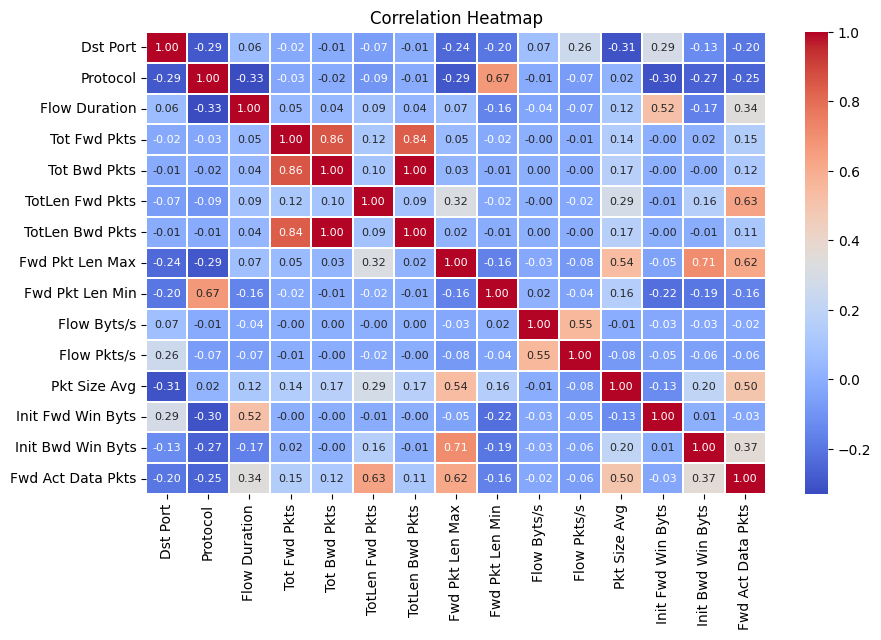

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_without_last_col = data[['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max',
                          'Fwd Pkt Len Min','Flow Byts/s', 'Flow Pkts/s','Pkt Size Avg', 'Init Fwd Win Byts',
                           'Init Bwd Win Byts', 'Fwd Act Data Pkts']]

# Selecting numeric columns
numeric_columns = df_without_last_col.select_dtypes(include='number').columns

# Creating a DataFrame with only numeric columns
df_numeric = df_without_last_col[numeric_columns]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))  # Increase figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8},linewidths=0.1)  # Adjust font size
plt.title('Correlation Heatmap')
plt.show()

This is a correlation heatmap, which is a graphical representation of the correlation matrix showing the correlation coefficients between variables. Each cell in the grid shows the correlation between two variables. The color scale, which goes from blue to red, indicates the strength and direction of the correlation: blue for negative correlation, red for positive correlation, and white for no correlation.

A few observations from the correlation heatmap of the features are as below:
1.	The most correlated features are the count of forward packets and backward packets. This correlation arises from the common characteristic of legitimate network traffic, which typically exhibits an equal number of forward and backward packets. Conversely, malicious traffic often displays an imbalance between the number of forward and backward packets.
2.	Another closely correlated feature is the flow duration. Legitimate network flows usually have a short duration, whereas malicious flows tend to be more prolonged.
3.	The total length of forward packets and backward packets exhibits a high correlation, given that the combined length of packets is generally proportional to the flow duration.
4.	There is a negative correlation between the flow bytes per second feature and the packet size average feature. This is attributed to the fact that larger packets typically result in a lower flow bytes per second rate compared to smaller packets.








In [ ]:
data.Label.value_counts()

Label
Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: count, dtype: int64

In [ ]:
!git clone -q https://github.com/Colorado-Mesa-University-Cybersecurity/DeepLearning-IDS.git

In [ ]:
!python DeepLearning-IDS/data_cleanup.py "Friday-23-02-2018_TrafficForML_CICFlowMeter.csv" "result23022018"

cleaning Friday-23-02-2018_TrafficForML_CICFlowMeter.csv
total rows read = 1048576
all done writing 1042868 rows; dropped 5708 rows


# Finding relevant features

In [ ]:
ben_df= pd.read_csv('/content/result23022018-Benign.csv')

In [ ]:
ben_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,1.519374e+09,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,1.519374e+09,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,1.519374e+09,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,1.519374e+09,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,1.519374e+09,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042296,54116,6,1.519376e+09,85992425,2,0,0,0,0,0,...,20,0.0,0.0,0,0,85992425.0,0.000000e+00,85992425,85992425,Benign
1042297,33914,6,1.519389e+09,132,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1042298,53,17,1.519388e+09,79134,1,1,41,98,41,41,...,8,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1042299,3389,6,1.519390e+09,10053785,11,12,1321,1659,677,0,...,20,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign


from matplotlib import pyplot as plt
ben_df['Dst Port'].plot(kind='hist', bins=20, title='Dst Port')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Protocol'].plot(kind='hist', bins=20, title='Protocol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Timestamp'].plot(kind='hist', bins=20, title='Timestamp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Flow Duration'].plot(kind='hist', bins=20, title='Flow Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df.plot(kind='scatter', x='Dst Port', y='Protocol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df.plot(kind='scatter', x='Protocol', y='Timestamp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df.plot(kind='scatter', x='Timestamp', y='Flow Duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
ben_df.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Dst Port']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ben_df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Dst Port')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Protocol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ben_df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Protocol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Flow Duration']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ben_df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Flow Duration')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Tot Fwd Pkts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ben_df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Tot Fwd Pkts')

from matplotlib import pyplot as plt
ben_df['Dst Port'].plot(kind='line', figsize=(8, 4), title='Dst Port')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Protocol'].plot(kind='line', figsize=(8, 4), title='Protocol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Timestamp'].plot(kind='line', figsize=(8, 4), title='Timestamp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
ben_df['Flow Duration'].plot(kind='line', figsize=(8, 4), title='Flow Duration')
plt.gca().spines[['top', 'right']].set_visible(False)

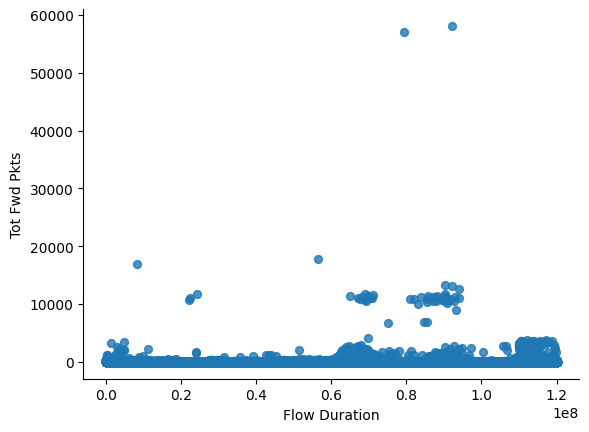

In [ ]:
from matplotlib import pyplot as plt
ben_df.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

This scatter plot illustrates that there's little to no strong linear relationship between 'Flow Duration' and 'Tot Fwd Pkts'. The majority of data points are clustered at lower values for both variables, with a few outliers showing high packet counts over varied flow durations.

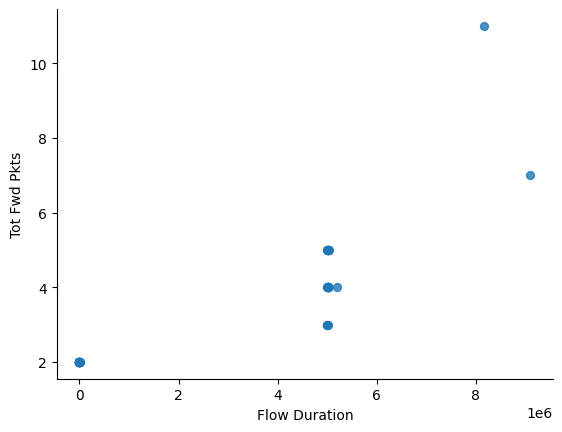

In [ ]:
from matplotlib import pyplot as plt
sql_attack_df.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The scatter plot shows 'Tot Fwd Pkts' versus 'Flow Duration', with most points concentrated at lower flow durations. There's a very sparse distribution with no clear trend, suggesting no correlation between the flow duration and the total forward packets within this dataset.

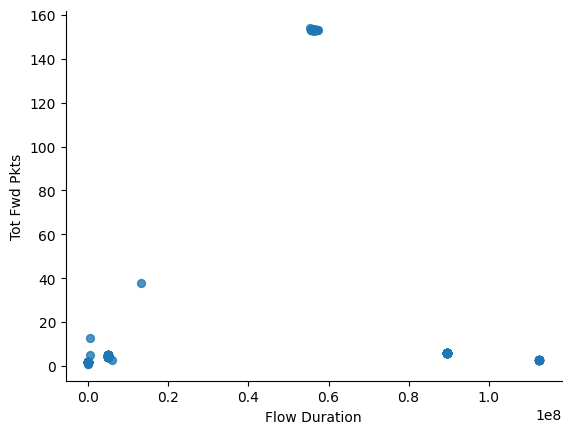

In [ ]:
from matplotlib import pyplot as plt
Brute_web_df.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

This scatter plot suggests that higher 'Tot Fwd Pkts' are not common and occur with varying 'Flow Duration'. The majority of data points lie near the origin, indicating that shorter flow durations are associated with fewer forward packets, with some exceptions.

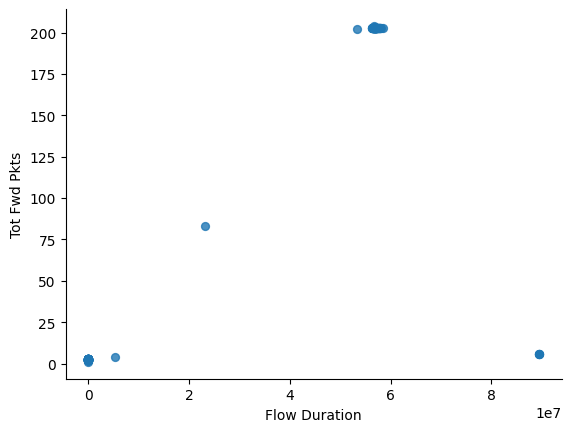

In [ ]:
from matplotlib import pyplot as plt
Brute_xss_df.plot(kind='scatter', x='Flow Duration', y='Tot Fwd Pkts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

The scatter plot displays a few isolated instances of high 'Tot Fwd Pkts' which do not show a clear correlation with 'Flow Duration'. The data is sparse and indicates that high packet counts are relatively rare, regardless of the duration of the flow.

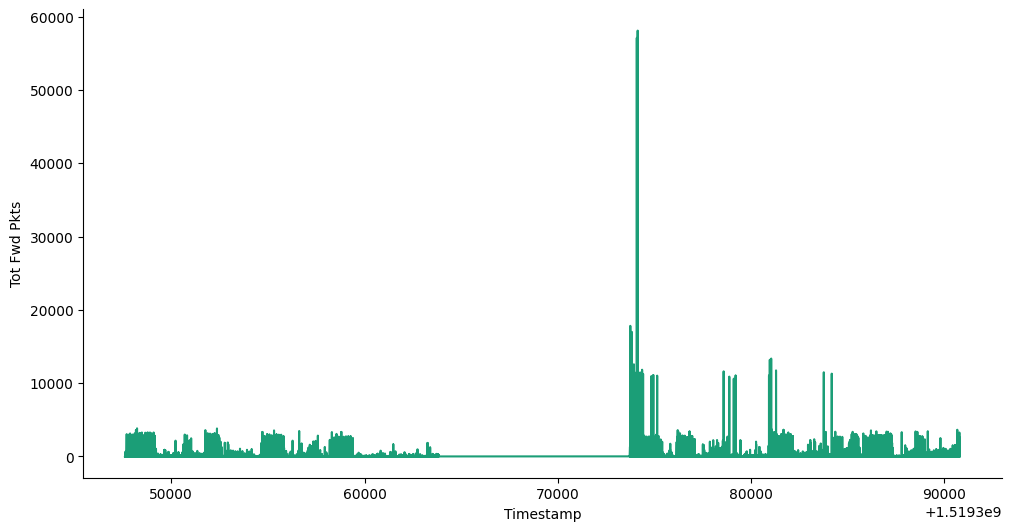

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Timestamp']
  ys = series['Tot Fwd Pkts']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = ben_df.sort_values('Timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
_ = plt.ylabel('Tot Fwd Pkts')

This bar graph shows 'Tot Fwd Pkts' over different timestamps. There are sporadic spikes in the number of forward packets at certain times, indicating possible bursts of activity or events causing a high number of packets being sent. The activity appears relatively low for most timestamps, with occasional periods of significantly higher activity.

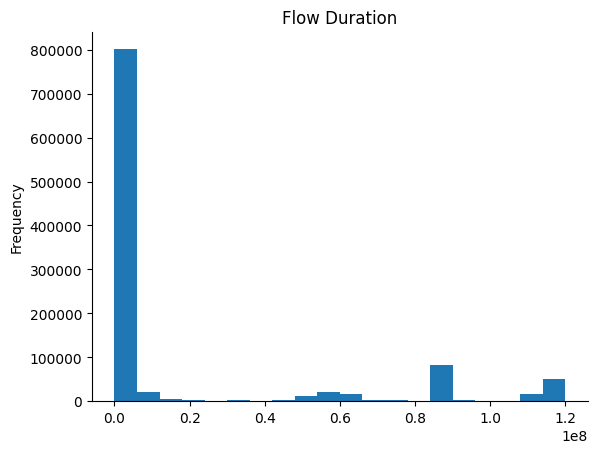

In [ ]:
from matplotlib import pyplot as plt
ben_df['Flow Duration'].plot(kind='hist', bins=20, title='Flow Duration')
plt.gca().spines[['top', 'right',]].set_visible(False)


The histogram displays the frequency of flow durations, with the majority of flows having very short durations (close to 0), and only a few flows have longer durations. This suggests that short flows are common, while long flows are relatively rare in this dataset.

In [ ]:
ben_df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

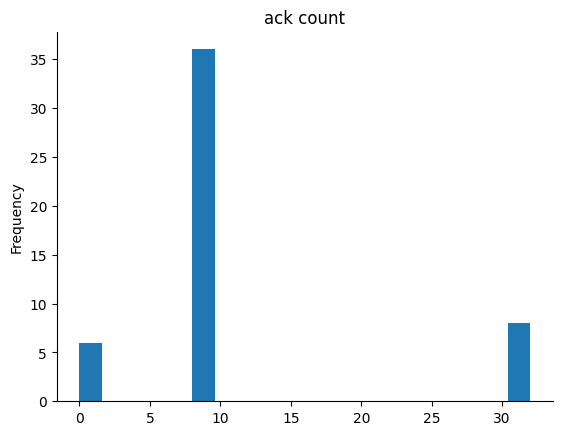

In [ ]:
from matplotlib import pyplot as plt
ben_df[:50]['Fwd Seg Size Min'].plot(kind='hist', bins=20, title='ack count')
plt.gca().spines[['top', 'right',]].set_visible(False)


The histogram shows the distribution of 'ack count' (acknowledgment packets count) with most counts clustering around 10, a few occurrences at 0, and some around 30. This suggests a common frequency of acknowledgment packets, with 10 being the most frequent, and other counts being less common.

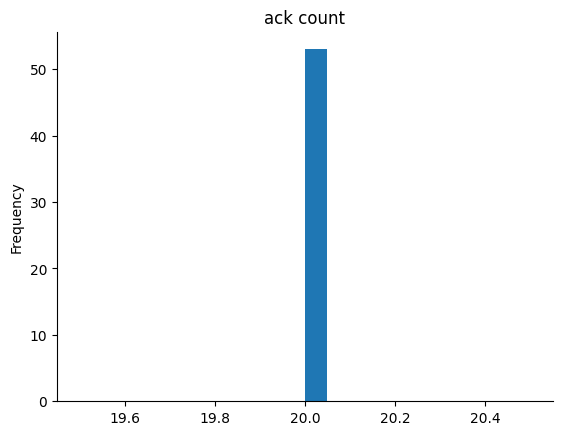

In [ ]:
from matplotlib import pyplot as plt
sql_attack_df['Fwd Seg Size Min'].plot(kind='hist', bins=20, title='ack count')
plt.gca().spines[['top', 'right',]].set_visible(False)


The histogram indicates that the 'ack count' is predominantly centered around a specific value (20 in this case), with very little variation. This concentration suggests a consistent number of acknowledgment packets across the observed instances.

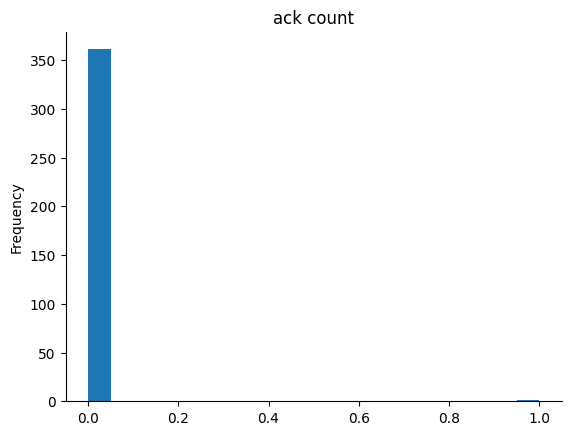

In [ ]:
from matplotlib import pyplot as plt
Brute_web_df['Fwd PSH Flags'].plot(kind='hist', bins=20, title='ack count')
plt.gca().spines[['top', 'right',]].set_visible(False)


This histogram shows that almost all the 'ack counts' are zero, indicating that acknowledgment packets are either not present or not recorded for the vast majority of the flows in this dataset.

In [ ]:
sql_attack_df= pd.read_csv('/content/result23022018-SQL Injection.csv')
sql_attack_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,1.519355e+09,5028696,5,5,789,1414,399,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
1,80,6,1.519355e+09,22,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
2,80,6,1.519355e+09,5015387,4,4,603,364,603,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
3,80,6,1.519355e+09,52,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
4,80,6,1.519355e+09,5018682,5,5,445,3085,445,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
5,80,6,1.519355e+09,56,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
6,80,6,1.519355e+09,8166442,11,8,2307,9011,598,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
7,80,6,1.519355e+09,5017729,5,3,453,1806,453,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
8,80,6,1.519355e+09,5010641,4,4,483,526,483,0,...,20,0,0,0,0,0,0,0,0,SQL Injection
9,80,6,1.519355e+09,13,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,SQL Injection


In [ ]:
Brute_web_df= pd.read_csv('/content/result23022018-Brute Force -Web.csv')
Brute_web_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,1.519380e+09,5821967,3,1,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
1,80,6,1.519380e+09,55332482,154,107,54442,80771,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
2,80,6,1.519380e+09,177,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
3,0,0,1.519380e+09,112640956,3,0,0,0,0,0,...,0,0,0,0,0,56320478.00,5.374012e+01,56320516,56320440,Brute Force -Web
4,500,17,1.519380e+09,89479476,6,0,3000,0,500,500,...,8,4000257,0,4000257,4000257,21369804.75,1.528101e+07,41990219,7200399,Brute Force -Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,80,6,1.519384e+09,56130475,153,104,54995,72486,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
358,80,6,1.519384e+09,105,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
359,80,6,1.519384e+09,5011371,4,4,646,364,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
360,80,6,1.519384e+09,13,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web


In [ ]:
Brute_xss_df= pd.read_csv('/content/result23022018-Brute Force -XSS.csv')
Brute_xss_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,1.519348e+09,5349549,4,4,365,809,365,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
1,80,6,1.519348e+09,31,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
2,80,6,1.519348e+09,53377612,202,109,54500,195341,680,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
3,80,6,1.519348e+09,1071,3,0,0,0,0,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
4,80,6,1.519348e+09,56908317,203,104,56330,189985,680,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,80,6,1.519352e+09,56970928,203,104,56083,189918,680,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
147,80,6,1.519352e+09,851,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
148,80,6,1.519352e+09,56883446,203,104,56330,189985,680,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS
149,80,6,1.519352e+09,78,2,0,0,0,0,0,...,20,0,0,0,0,0.0,0.0,0,0,Brute Force -XSS


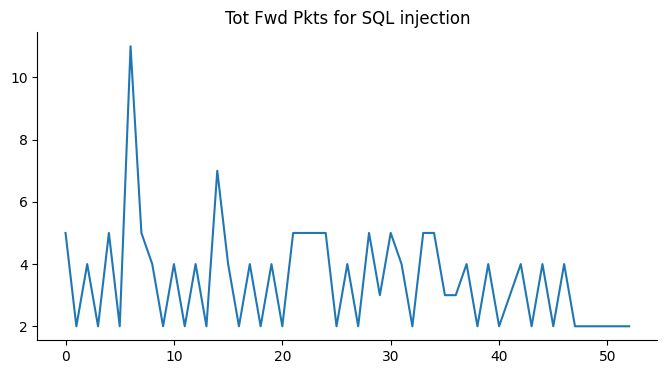

In [ ]:
from matplotlib import pyplot as plt
sql_attack_df['Tot Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Fwd Pkts for SQL injection')
plt.gca().spines[['top', 'right']].set_visible(False)


The line chart displays 'Tot Fwd Pkts' (Total Forward Packets) for SQL injection attempts over a series of events or time periods. It shows variability in the count of forward packets, with some peaks suggesting moments of higher activity, possibly indicating more intense SQL injection attempts. The chart reflects the inconsistency and fluctuation in packet counts typically associated with such attacks.

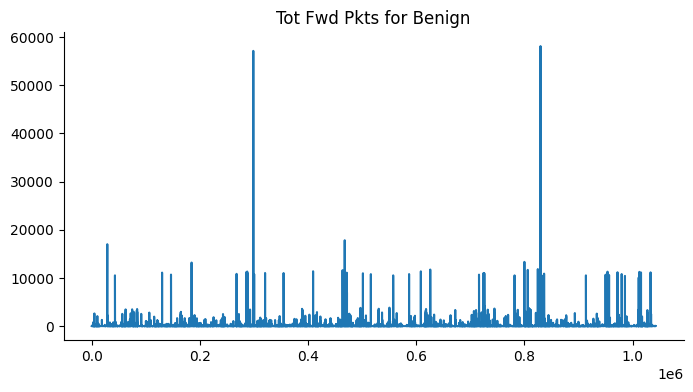

In [ ]:
from matplotlib import pyplot as plt
ben_df['Tot Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Fwd Pkts for Benign')
plt.gca().spines[['top', 'right']].set_visible(False)

The line chart represents the count of forward packets for benign (non-malicious) network flows. There are notable spikes in packet counts at certain points, suggesting occasional high activity even in non-malicious traffic. Compared to previous charts, this chart shows a similar pattern of infrequent spikes amidst generally lower activity levels. However, the spike heights in this benign context appear to be even higher than those in the SQL injection chart, indicating that benign flows can sometimes have very high packet counts.

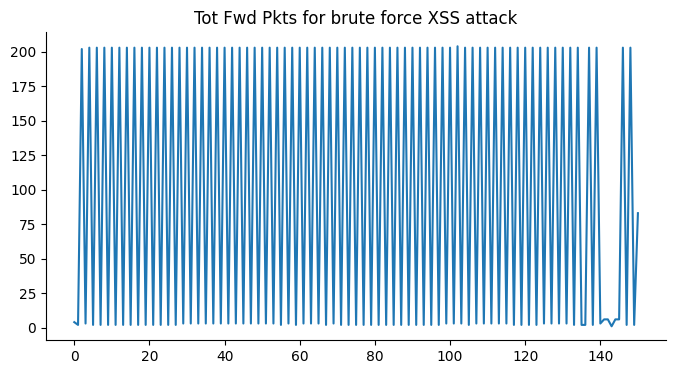

In [ ]:
from matplotlib import pyplot as plt
Brute_xss_df['Tot Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Fwd Pkts for brute force XSS attack')
plt.gca().spines[['top', 'right']].set_visible(False)

The bar chart depicts 'Tot Fwd Pkts' for brute force XSS attacks. Unlike benign traffic, the packet count here is consistently high and exhibits a rhythmic pattern, likely reflecting the repetitive nature of brute force attacks where many packets are sent in an attempt to exploit vulnerabilities. The high consistency and frequency of packet counts could be indicative of automated scripts or tools commonly used in such attacks. This contrasts with the benign traffic pattern, which shows less regularity and lower frequency in high packet counts.

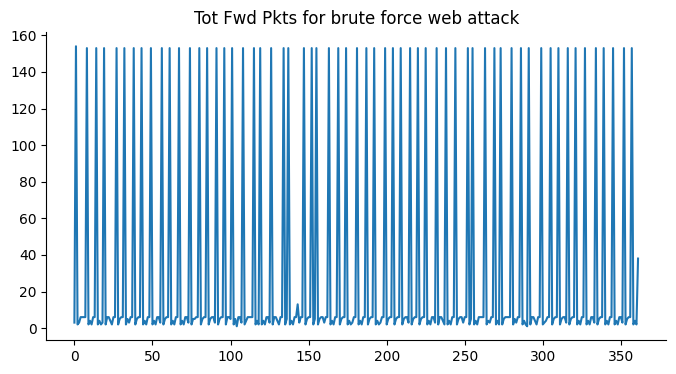

In [ ]:
from matplotlib import pyplot as plt
Brute_web_df['Tot Fwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Fwd Pkts for brute force web attack')
plt.gca().spines[['top', 'right']].set_visible(False)

This bar chart shows 'Tot Fwd Pkts' for brute force web attacks, characterized by a consistent pattern of high-frequency attempts. Each bar represents the packet count for an individual attack attempt, with the counts being relatively uniform, suggesting a methodical and sustained effort typical of brute force tactics. This pattern is similar to that of the brute force XSS attacks chart, indicating the systematic nature of these types of cyber threats.

In [ ]:
Brute_web_df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,6,1.519380e+09,5821967,3,1,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
1,80,6,1.519380e+09,55332482,154,107,54442,80771,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
2,80,6,1.519380e+09,177,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
3,0,0,1.519380e+09,112640956,3,0,0,0,0,0,...,0,0,0,0,0,56320478.00,5.374012e+01,56320516,56320440,Brute Force -Web
4,500,17,1.519380e+09,89479476,6,0,3000,0,500,500,...,8,4000257,0,4000257,4000257,21369804.75,1.528101e+07,41990219,7200399,Brute Force -Web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,80,6,1.519384e+09,56130475,153,104,54995,72486,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
358,80,6,1.519384e+09,105,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
359,80,6,1.519384e+09,5011371,4,4,646,364,646,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web
360,80,6,1.519384e+09,13,2,0,0,0,0,0,...,20,0,0,0,0,0.00,0.000000e+00,0,0,Brute Force -Web


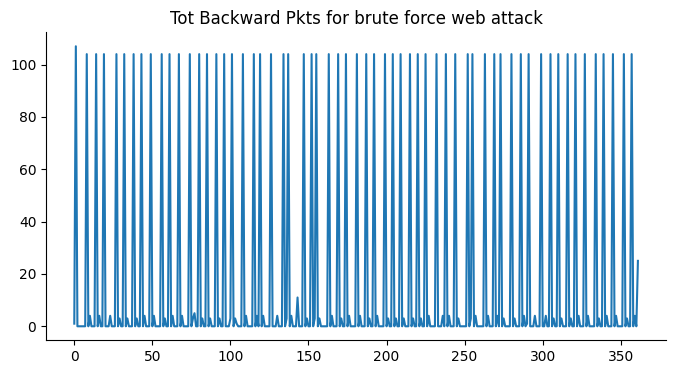

In [ ]:
from matplotlib import pyplot as plt
Brute_web_df['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Backward Pkts for brute force web attack')
plt.gca().spines[['top', 'right']].set_visible(False)

The bar chart represents 'Tot Backward Pkts' for brute force web attacks, showing a consistent volume of backward packets for each attack instance. Like the forward packets in brute force attacks, the backward packets also display a rhythmic pattern, indicating a structured and persistent response from the target or defensive measures. The consistency across the attacks suggests that the responses to each attack attempt are similar, possibly automated acknowledgments or rejections from the server under attack.

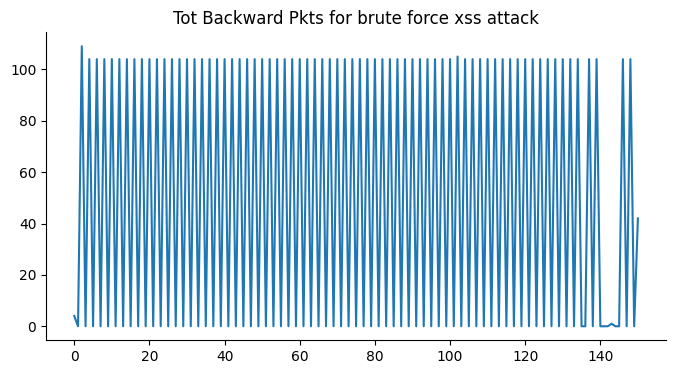

In [ ]:
from matplotlib import pyplot as plt
Brute_xss_df['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Backward Pkts for brute force xss attack')
plt.gca().spines[['top', 'right']].set_visible(False)

The bar chart shows 'Tot Backward Pkts' for brute force XSS (Cross-Site Scripting) attacks, indicating the number of packets sent in response to each attack attempt. The pattern is highly uniform, which is typical for automated attack responses, with a sharp decline toward the end. This pattern suggests that the responses to the attack attempts were consistent throughout, with a possible change in response strategy or a drop in attack intensity toward the end.

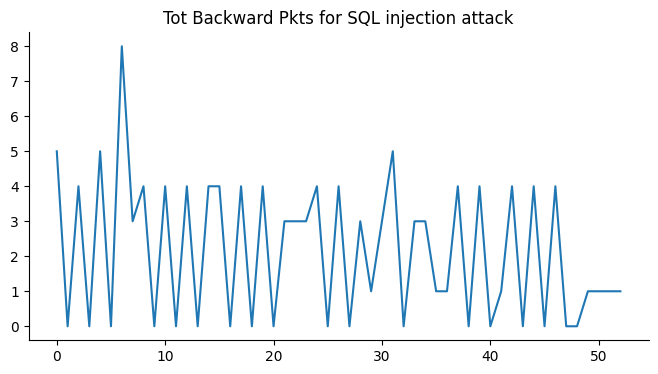

In [ ]:
from matplotlib import pyplot as plt
sql_attack_df['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Backward Pkts for SQL injection attack')
plt.gca().spines[['top', 'right']].set_visible(False)

The line chart shows 'Tot Backward Pkts' for SQL injection attacks, which are the packets sent from the target to the attacker. There is more variability in the count of backward packets compared to the brute force attacks, suggesting that the responses to SQL injection attacks may be less uniform, potentially due to varied success rates of the attack attempts or different responses by the target system.






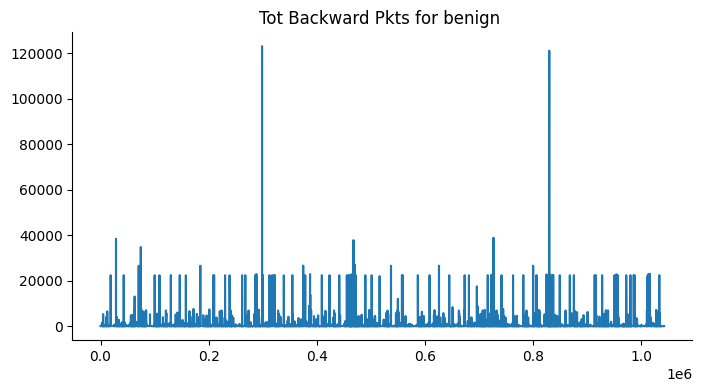

In [ ]:
from matplotlib import pyplot as plt
ben_df['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Backward Pkts for benign ')
plt.gca().spines[['top', 'right']].set_visible(False)

The bar chart displays 'Tot Backward Pkts' for benign network traffic, with occasional spikes indicating instances of higher than usual response packets. Unlike the earlier charts for attack scenarios, this chart shows a less regular pattern, reflecting the more unpredictable nature of benign traffic. The spikes could represent normal but high-volume data transfers or other legitimate bursts in network activity.

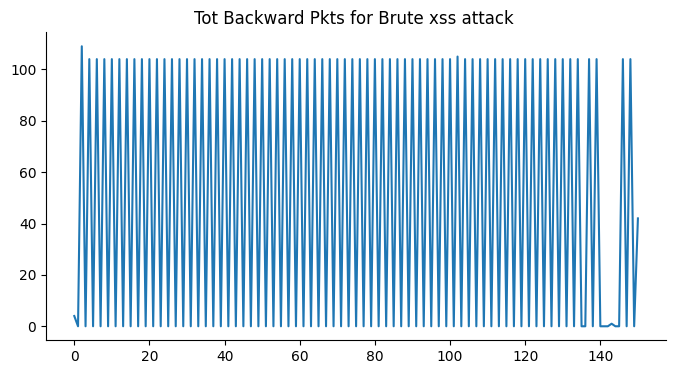

In [ ]:
from matplotlib import pyplot as plt
Brute_xss_df['Tot Bwd Pkts'].plot(kind='line', figsize=(8, 4), title='Tot Backward Pkts for Brute xss attack ')
plt.gca().spines[['top', 'right']].set_visible(False)

This bar chart represents 'Tot Backward Pkts' for Brute XSS attacks, showing a uniform pattern of backward packet counts, similar to the one observed for brute force web attacks. The uniformity suggests a consistent volume of responses to each attack attempt, which is typical for automated systems designed to deal with such security threats. Toward the end, there's a noticeable drop, which may imply a change in the attack pattern or a defensive adaptation.